In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from scipy.integrate import odeint
import scipy.optimize as opt
import emcee
%matplotlib inline

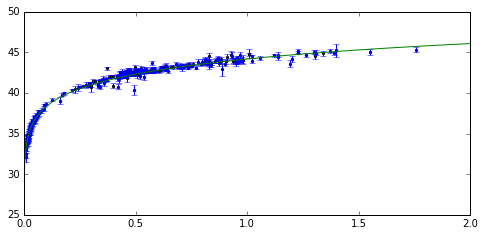

In [24]:
#Problem 2

z=np.loadtxt('SN.dat', usecols=[1])
mu=np.loadtxt('SN.dat', usecols=[2])
sigma=np.loadtxt('SN.dat', usecols=[3])

fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(211)
ax1.scatter(z, mu, s=5)
ax1.errorbar(z, mu, yerr=sigma, linestyle="None")
plt.xlim(xmin=0)
#print z

def CalcMu(z, par):
    omegam, h=par
    omegalambda=1-omegam
    H0=h*100
    z0=np.linspace(0,z,2000)
    dz=z/2000.0
    Dcs=0
    Dls=0
    mu0=0
    Mu=[]
    for z00 in z0:
        E=np.sqrt(np.abs(omegam*(1+z00)**3+omegalambda))
        dEs=dz/E*3000
        Dcs+=dEs
        Dls=Dcs*(1+z00)
        mu0=25-5*np.log10(h)+5*np.log10(Dls)#
        Mu.append(mu0)
    
    return Mu

par=[]
par.append(0.23)
par.append(0.7)
#print par
Mu0=CalcMu(2, par)
z0=np.linspace(0, 2, 2000)
#print Mu0
#ax2=fig.add_subplot(212)
ax1.plot(z0, Mu0)
plt.xlim(xmin=0, xmax=2)
plt.show()



Optimization terminated successfully.
         Current function value: 105.512909
         Iterations: 28
         Function evaluations: 54
[ 0.25596677  0.65383487]


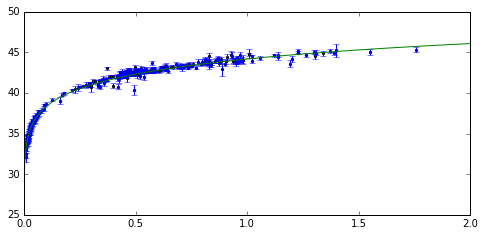

In [25]:
#Problem 3
def chi2(par, sigma, z, mu):
    chi2i=0
    cnt=0
    muth=CalcMu(2, par)
    for z000 in z:
        muthc=int(z000*1000)
        muth0=muth[muthc]
        chi2i += (mu[cnt]-muth0)**2/(sigma[cnt])
        cnt+=1
    return chi2i

bestfit=opt.fmin(chi2, par, args=(sigma, z, mu))
print bestfit
CalcMu(2, bestfit)

Mu0=CalcMu(2, par)
z0=np.linspace(0, 2, 2000)
#print Mu0
#ax2=fig.add_subplot(212)
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(211)
ax1.scatter(z, mu, s=5)
ax1.errorbar(z, mu, yerr=sigma, linestyle="None")
ax1 = fig.add_subplot(211)
ax1.plot(z0, Mu0)
plt.xlim(xmin=0, xmax=2)
plt.show()

We search for a maximum.
1
2
1


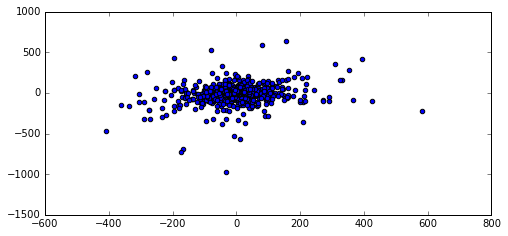

In [29]:
#Problem 4
print 'We search for a maximum.'

def lnprob(par1, par2, sigma, z, mu):
    par=[]
    par.append(par1)
    par.append(par2)
    L=-np.abs(chi2(par, sigma, z, mu))/2
    if L.any() > 0:
        return -1000
    else:
        return L

#def lnprob(x, mu, icov):
#    diff = x-mu
#    return -np.dot(diff,np.dot(icov,diff))/2.0
ndim = 2
print '1'
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)
icov = np.linalg.inv(cov)
nwalkers = len(z)
print '2'
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
#sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, sigma, z, mu])
pos, prob, state = sampler.run_mcmc(p0, 10)
sampler.reset()
sampler.run_mcmc(pos, 10)
print '1'
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(211)
ax1.scatter(sampler.flatchain[:,0], sampler.flatchain[:,1])
plt.show()


In [30]:
print 'For the above problem, I think I messed up something, but'
print 'I do believe the plot was obtained from the correct functions.'
print 'It has to do with I taking abs values to prevent sqrt returning error'
print 'but that makes the plot symmetric about 0, so'
print 'I am not able to obtain any useful information.'
print 'If correct plot can be obtained,'
print 'I would be able to use the information to do a plot'
print 'just like the ones for problem 2 and 3.'

For the above problem, I think I messed up something, but
I do believe the plot was obtained from the correct functions.
It has to do with I taking abs values to prevent sqrt returning error
but that makes the plot symmetric about 0, so
I am not able to obtain any useful information.
If correct plot can be obtained,
I would be able to use the information to do a plot
just like the ones for problem 2 and 3.
